In [1]:
import librosa
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
import madmom

In [3]:
import csv

In [4]:
df = pd.read_csv("accuracy.csv")

dict = {}

genres = df['Genre'].tolist()

df = df.drop(['Genre', 'NumFiles'], axis=1)

for i,j in df.items():
    dict.update({i: j.tolist()})

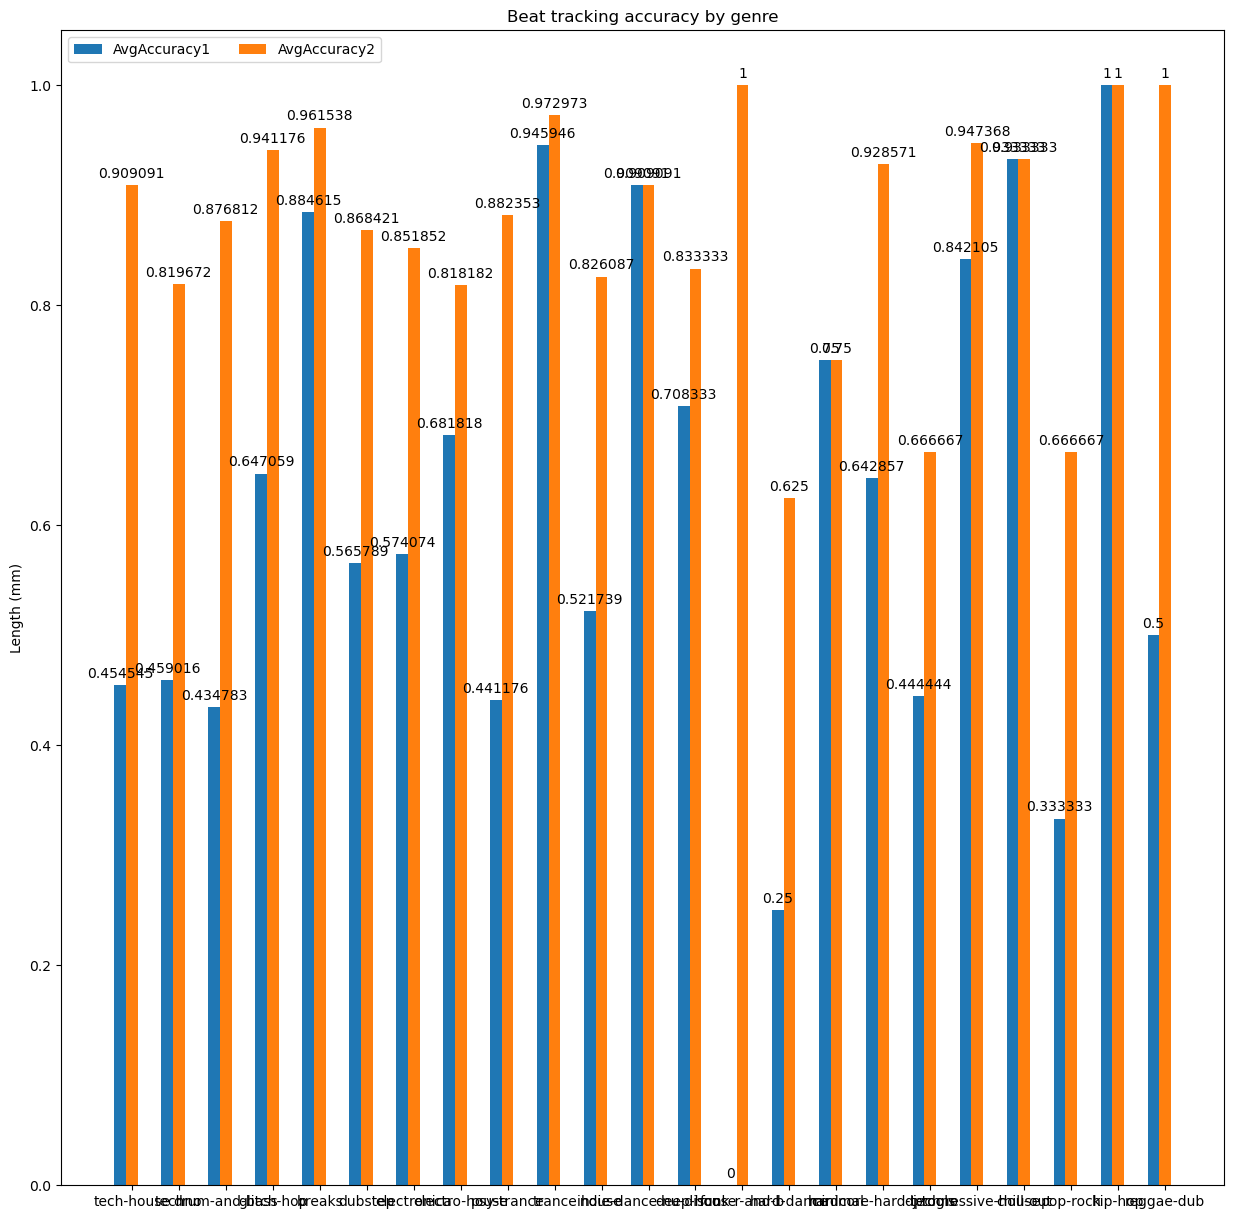

In [11]:
## BAR CHART
# From matplotlib docs
# https://matplotlib.org/stable/gallery/lines_bars_and_markers/barchart.html#sphx-glr-gallery-lines-bars-and-markers-barchart-py

x = np.arange(len(df))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots(figsize=(20, 15))

for attribute, stats in dict.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, stats, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Length (mm)')
ax.set_title('Beat tracking accuracy by genre')
ax.set_xticks(x + width, genres)
ax.legend(loc='upper left', ncols=3)

plt.show()